In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import metrics

In [2]:
df=pd.read_csv("CarPrice_Assignment.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [4]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
df.describe() #it can only happen on the quantifiable data.

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
print(df[["fuelsystem"]])

    fuelsystem
0         mpfi
1         mpfi
2         mpfi
3         mpfi
4         mpfi
..         ...
200       mpfi
201       mpfi
202       mpfi
203        idi
204       mpfi

[205 rows x 1 columns]


<AxesSubplot:>

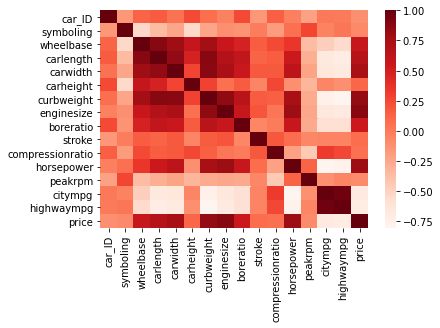

In [7]:
sns.heatmap(df.corr(),cmap="Reds")

In [8]:
df.corr()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


<AxesSubplot:>

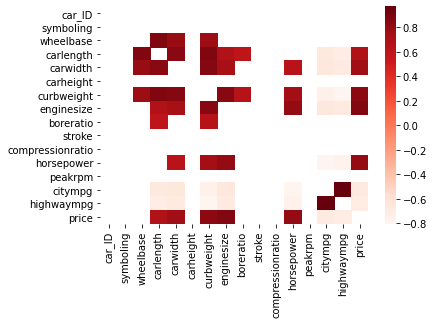

In [9]:
corr = df.corr()
high_corr = corr[((corr>=.6) | (corr<=-.6)) & (corr!=1)] 
sns.heatmap(high_corr,cmap="Reds")

In [10]:
# above heatmap shows the factors responsible for high price are: carlength, horsepower

#factors responsible for low prices: citympg

#so we will build a model which will utilize just the above features and thereby predict the price

In [11]:
x=df[["carlength","wheelbase","carwidth","carheight","curbweight","enginesize","boreratio","stroke","compressionratio","horsepower","peakrpm","citympg","highwaympg"]]
y=df[["price"]]

In [12]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.3,random_state=50)

In [13]:
reg=LinearRegression()

In [14]:
reg.fit(X_train,Y_train)

LinearRegression()

In [15]:
predictions = reg.predict(X_test)

<IPython.core.display.Javascript object>

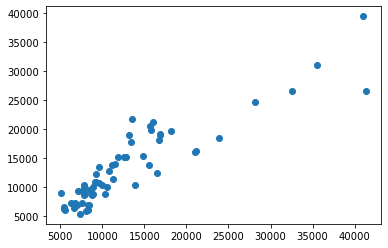

In [16]:
plt.scatter(Y_test,predictions)

In [17]:
r2_score(Y_test,predictions)

0.8154772677954376

In [18]:
#with LinearRegression Accuracy is 81%.
#Let us find a better way to improve accuracy and then include our categorical features as well.

In [19]:
#Solution: We will now encode categorical data into quantifiable form & then apply our Linear Regression Model to it.

In [20]:
df2=pd.get_dummies(df["fueltype"])
df3=pd.get_dummies(df["aspiration"])
df4=pd.get_dummies(df["doornumber"])
df5=pd.get_dummies(df["carbody"])
df6=pd.get_dummies(df["drivewheel"])
df7=pd.get_dummies(df["enginelocation"])
df8=pd.get_dummies(df["enginetype"])
#df9=pd.get_dummies(df["cylindernumber"])
df10=pd.get_dummies(df["fuelsystem"])

df.drop(labels="fueltype",axis=1,inplace=True)
df.drop(labels="aspiration",axis=1,inplace=True)
df.drop(labels="doornumber",axis=1,inplace=True)
df.drop(labels="carbody",axis=1,inplace=True)
df.drop(labels="drivewheel",axis=1,inplace=True)
df.drop(labels="enginelocation",axis=1,inplace=True)
df.drop(labels="enginetype",axis=1,inplace=True)
#df.drop(labels="cylindernumber",axis=1,inplace=True)
df.drop(labels="fuelsystem",axis=1,inplace=True)

In [21]:
df=pd.concat([df2,df3,df4,df5,df6,df7,df8,df10,df],axis=1)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 49 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   diesel            205 non-null    uint8  
 1   gas               205 non-null    uint8  
 2   std               205 non-null    uint8  
 3   turbo             205 non-null    uint8  
 4   four              205 non-null    uint8  
 5   two               205 non-null    uint8  
 6   convertible       205 non-null    uint8  
 7   hardtop           205 non-null    uint8  
 8   hatchback         205 non-null    uint8  
 9   sedan             205 non-null    uint8  
 10  wagon             205 non-null    uint8  
 11  4wd               205 non-null    uint8  
 12  fwd               205 non-null    uint8  
 13  rwd               205 non-null    uint8  
 14  front             205 non-null    uint8  
 15  rear              205 non-null    uint8  
 16  dohc              205 non-null    uint8  
 1

In [23]:
df

,diesel,gas,std,turbo,four,two,convertible,hardtop,hatchback,sedan,...,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,0,1,1,0,0,1,1,0,0,0,...,four,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,0,1,1,0,0,1,1,0,0,0,...,four,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,0,1,1,0,0,1,0,0,1,0,...,six,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,0,1,1,0,1,0,0,0,0,1,...,four,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,0,1,1,0,1,0,0,0,0,1,...,five,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0,1,1,0,1,0,0,0,0,1,...,four,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,0,1,0,1,1,0,0,0,0,1,...,four,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,0,1,1,0,1,0,0,0,0,1,...,six,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,1,0,0,1,1,0,0,0,0,1,...,six,145,3.01,3.40,23.0,106,4800,26,27,22470.0


In [24]:
#now let us try again to build the Linear Regression Model
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 49 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   diesel            205 non-null    uint8  
 1   gas               205 non-null    uint8  
 2   std               205 non-null    uint8  
 3   turbo             205 non-null    uint8  
 4   four              205 non-null    uint8  
 5   two               205 non-null    uint8  
 6   convertible       205 non-null    uint8  
 7   hardtop           205 non-null    uint8  
 8   hatchback         205 non-null    uint8  
 9   sedan             205 non-null    uint8  
 10  wagon             205 non-null    uint8  
 11  4wd               205 non-null    uint8  
 12  fwd               205 non-null    uint8  
 13  rwd               205 non-null    uint8  
 14  front             205 non-null    uint8  
 15  rear              205 non-null    uint8  
 16  dohc              205 non-null    uint8  
 1

In [25]:
x=df[["diesel","gas","std","turbo","four","two","convertible","hardtop","hatchback","sedan","wagon","4wd","fwd","rwd","front","rear","dohc","dohcv","l","ohc","ohcf","rotor","1bbl","2bbl","4bbl","idi","mfi","mpfi","spdi","spfi","carlength","wheelbase","carwidth","carheight","curbweight","enginesize","boreratio","stroke","compressionratio","horsepower","peakrpm","citympg","highwaympg"]]
y=df[["price"]]

In [26]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,train_size=0.7,test_size=0.3,random_state=50)

In [27]:
reg=LinearRegression()

In [28]:
reg.fit(X_train,Y_train)

LinearRegression()

In [29]:
predictions = reg.predict(X_test)

<IPython.core.display.Javascript object>

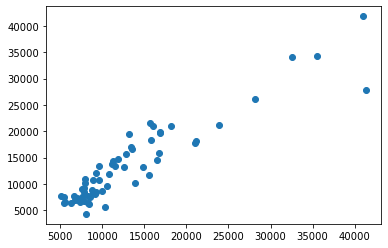

In [30]:
plt.scatter(Y_test,predictions)

In [31]:
r2_score(Y_test,predictions)

0.860709443054243